<a href="https://colab.research.google.com/github/abhishekmishra-bareilly/Math-Module/blob/main/Assignment_Part_1_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the dependancy**

In [40]:
!pip install -q xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math


from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


In [3]:
# Import the data
data = pd.read_excel('/DS - Assignment Part 1 data set.xlsx')
data

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [4]:
#Check the shape
data.shape

(414, 9)

In [5]:
# Check the null values in the dataset
data.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

## **Feature Engineering**

In [6]:
# put all int features in num_features columns
num_features = data.describe().columns
num_features

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [7]:
len(num_features)

9

* So we have all num features

### Histogram plot

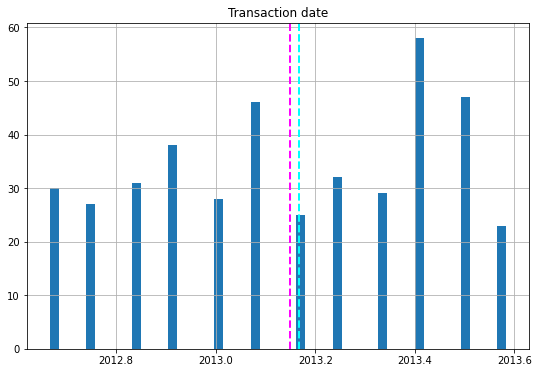

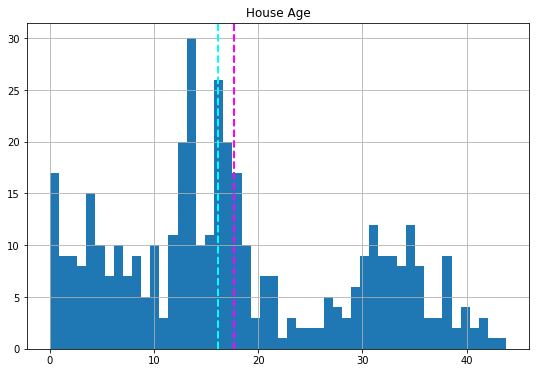

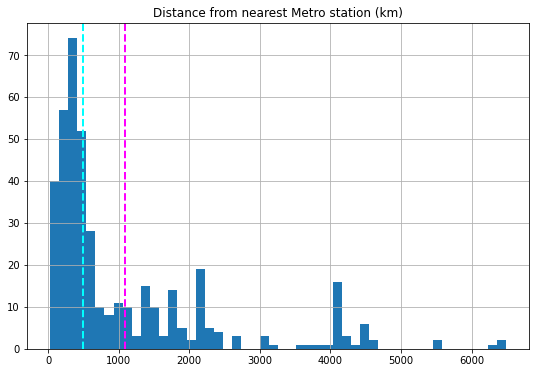

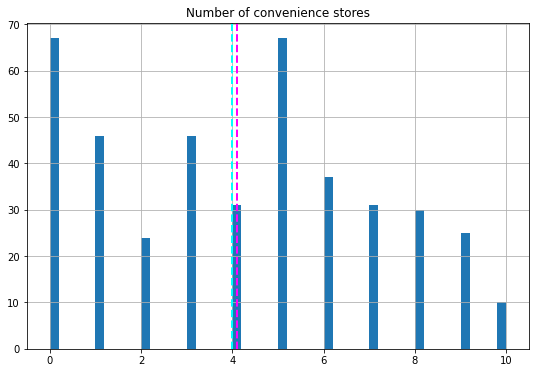

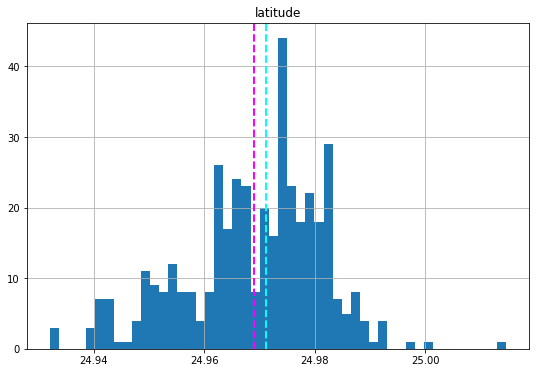

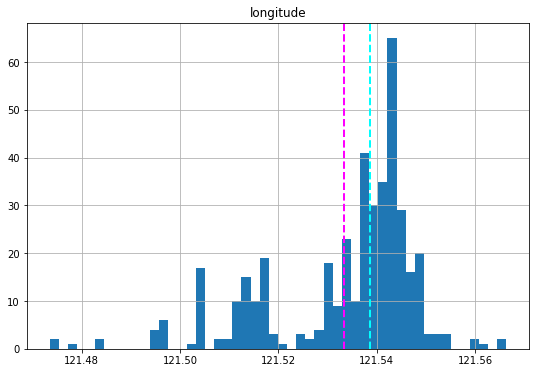

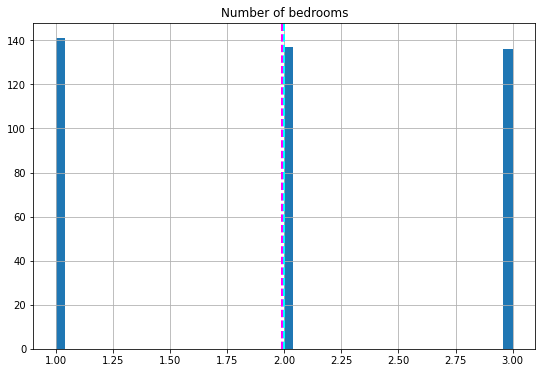

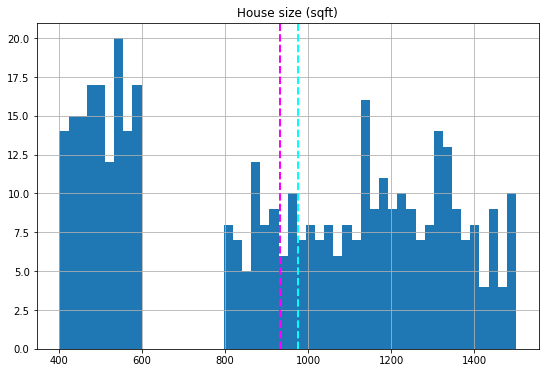

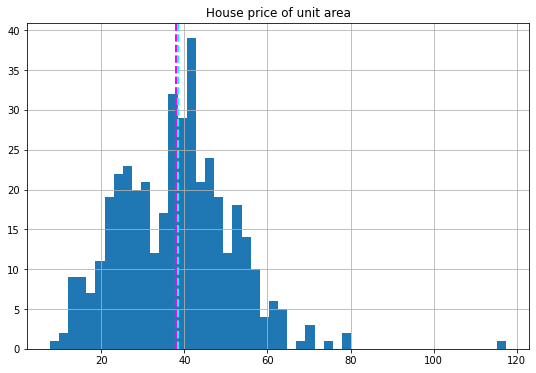

In [9]:
#plot a bar plot for each numerical feature count

for col in num_features:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = data[col]
  feature.hist(bins = 50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed',linewidth=2)
  ax.set_title(col)
plt.show()

### Correlation & scatter plot 'House price of unit area'

In [12]:
# Function
def corr_plot(num_features,data,label):
  # Correlation & scatter plot 'Rented Bike Count'
  for col in num_features[1:-1]:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature =(data[col])
    label1 = data[label]
    correlation = feature.corr(label1)
    plt.scatter(x=feature, y=label1)
    plt.xlabel(col)
    plt.ylabel(label)
    ax.set_title(label + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data[col], data[label], 1)
    y_hat = np.poly1d(z)(data[col])

    plt.plot(data[col], y_hat, "r--", lw=1)


  plt.show()

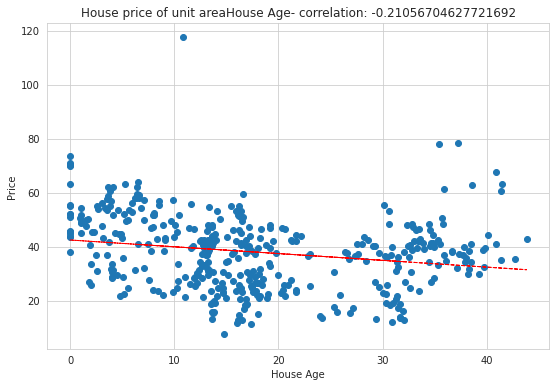

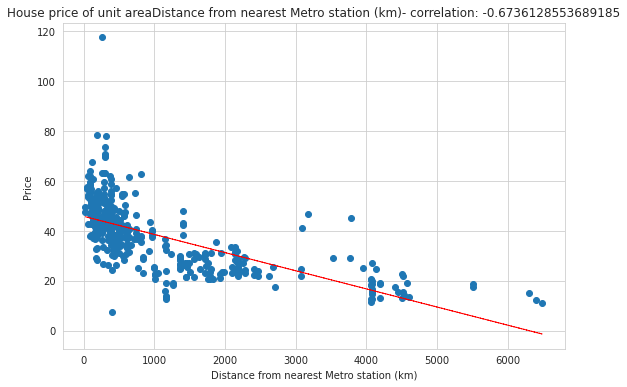

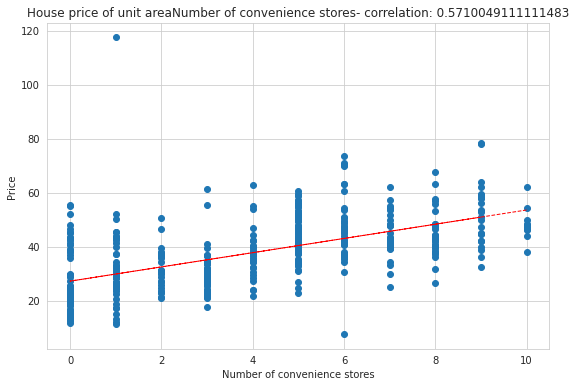

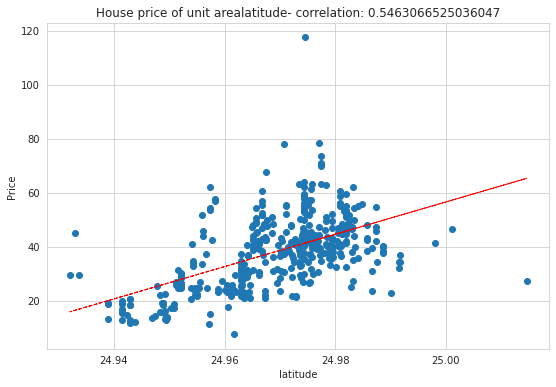

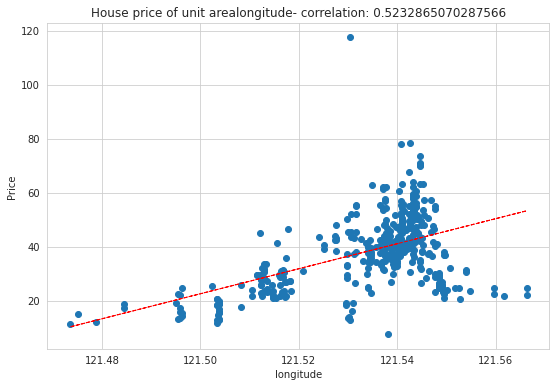

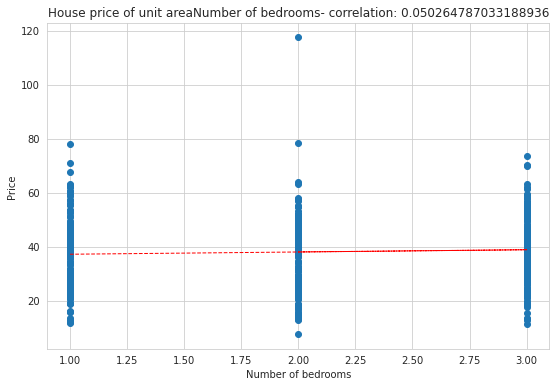

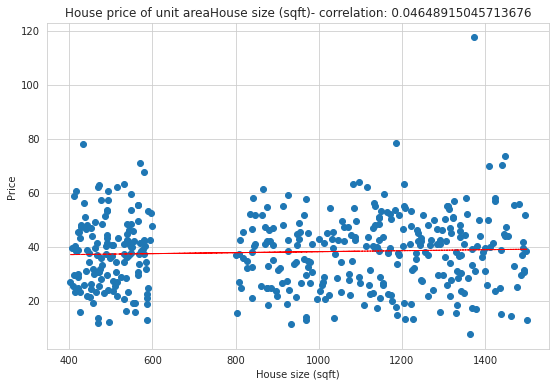

In [18]:
label = 'House price of unit area'
corr_plot(num_features,data,label)

### **Pair plot implemented for dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


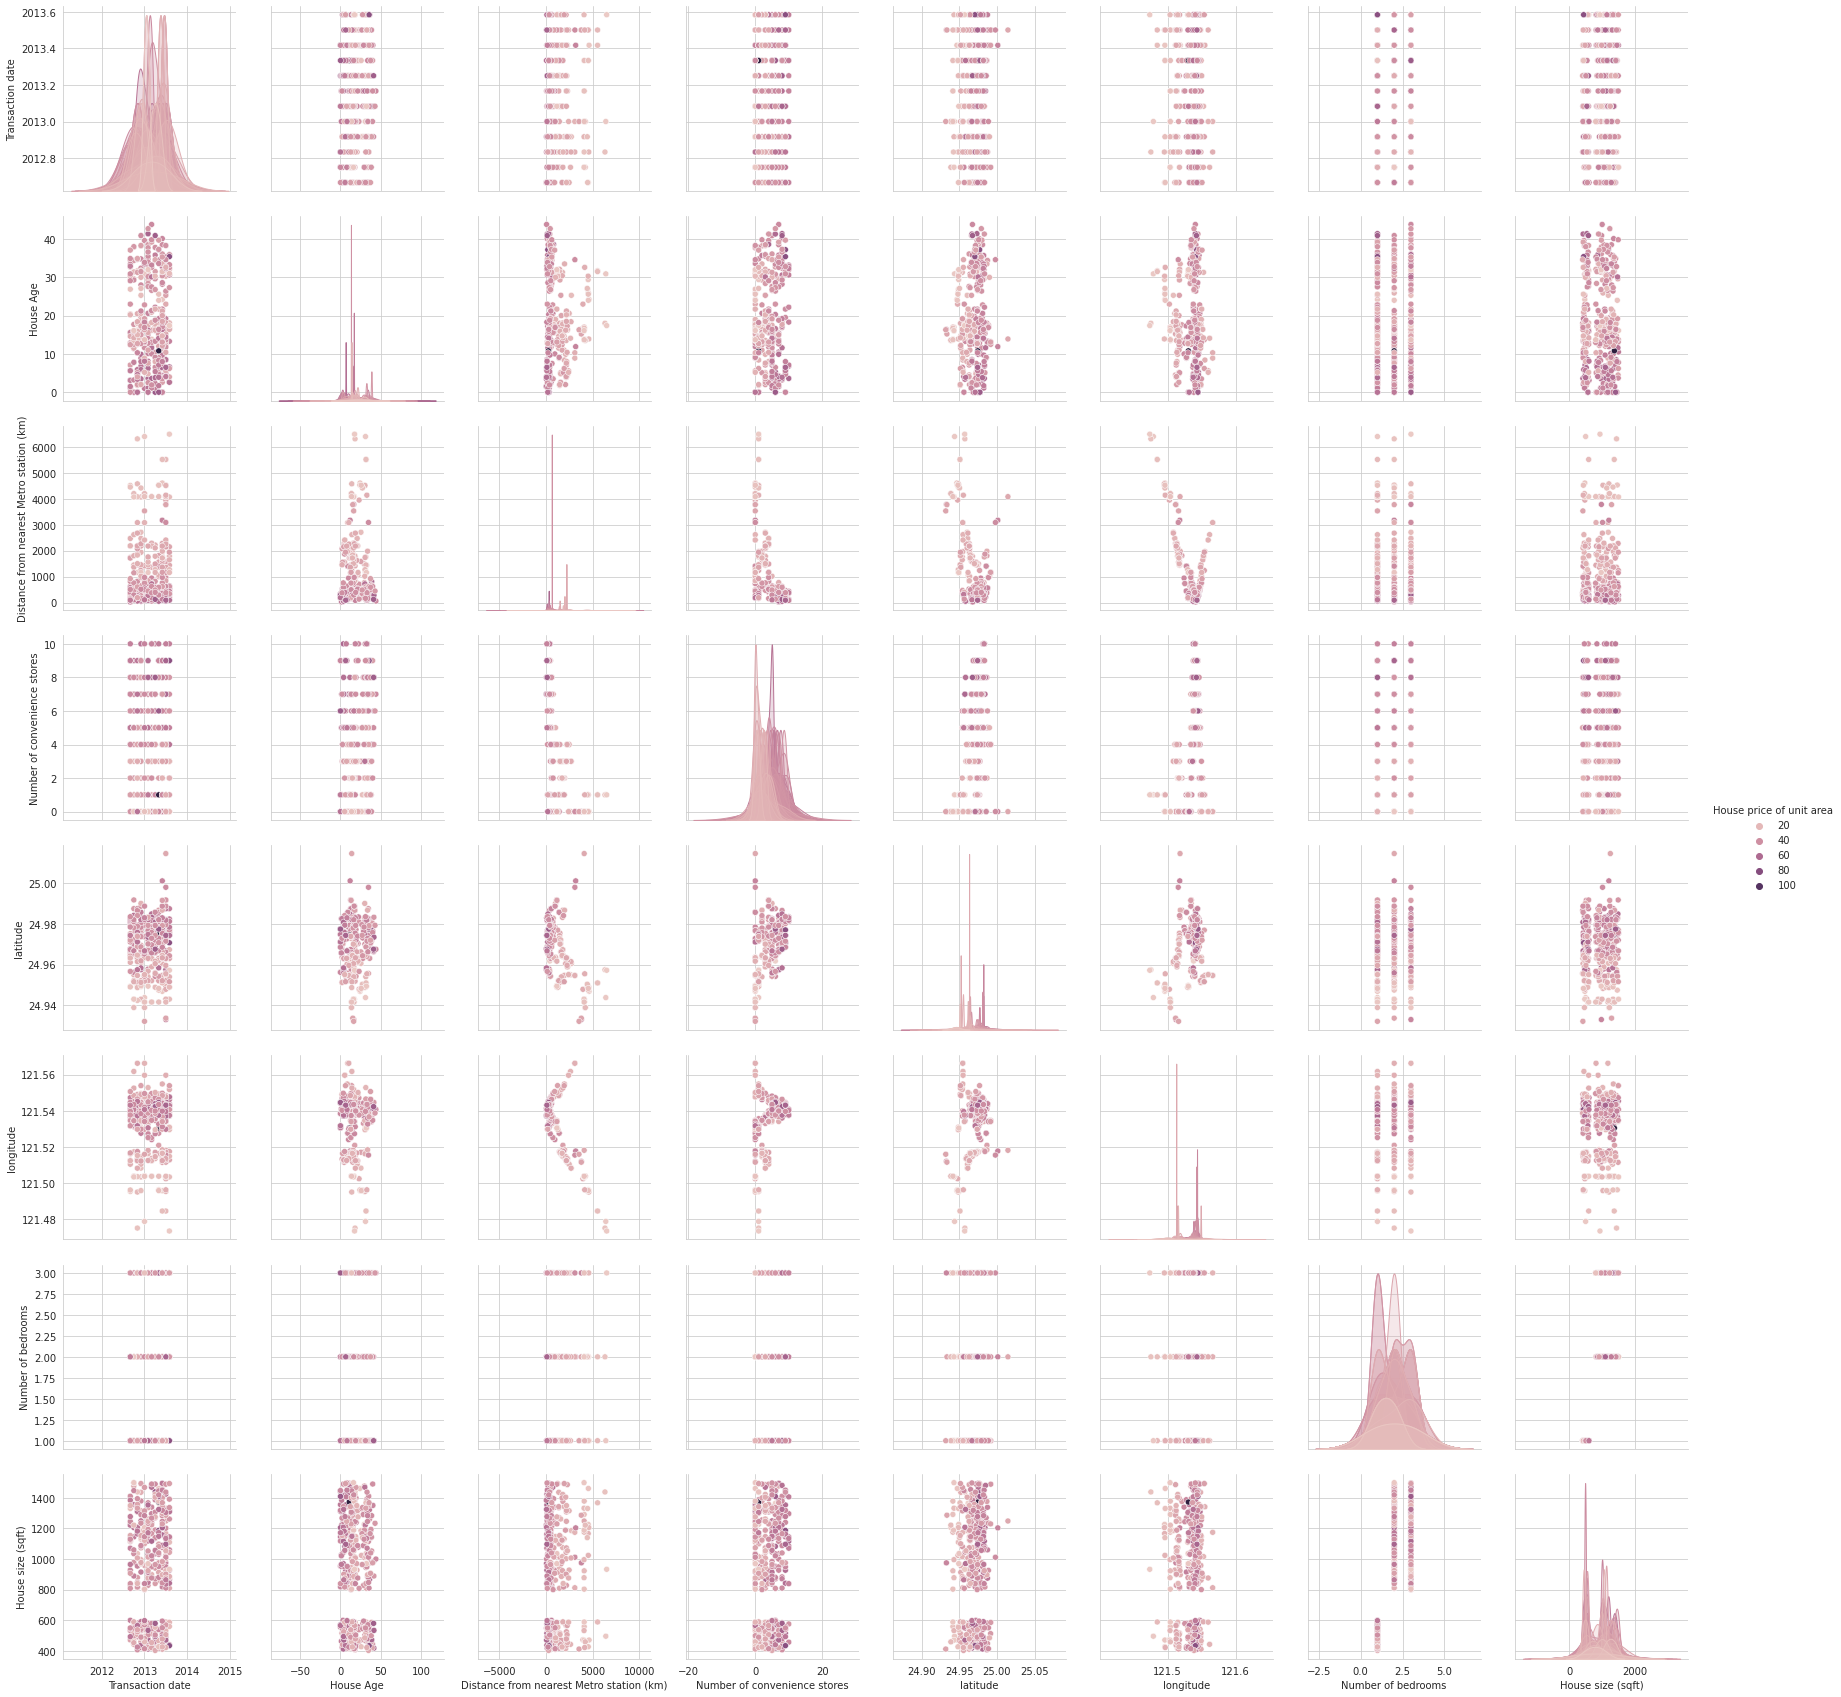

In [19]:
# pair plot implemented for dataset
sns.set_style("whitegrid");
sns.pairplot(data, hue="House price of unit area", size=3);
plt.show()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


### **Check for corr**

In [21]:
# Check the correlation on data set
data.corr()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
Transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529
House Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


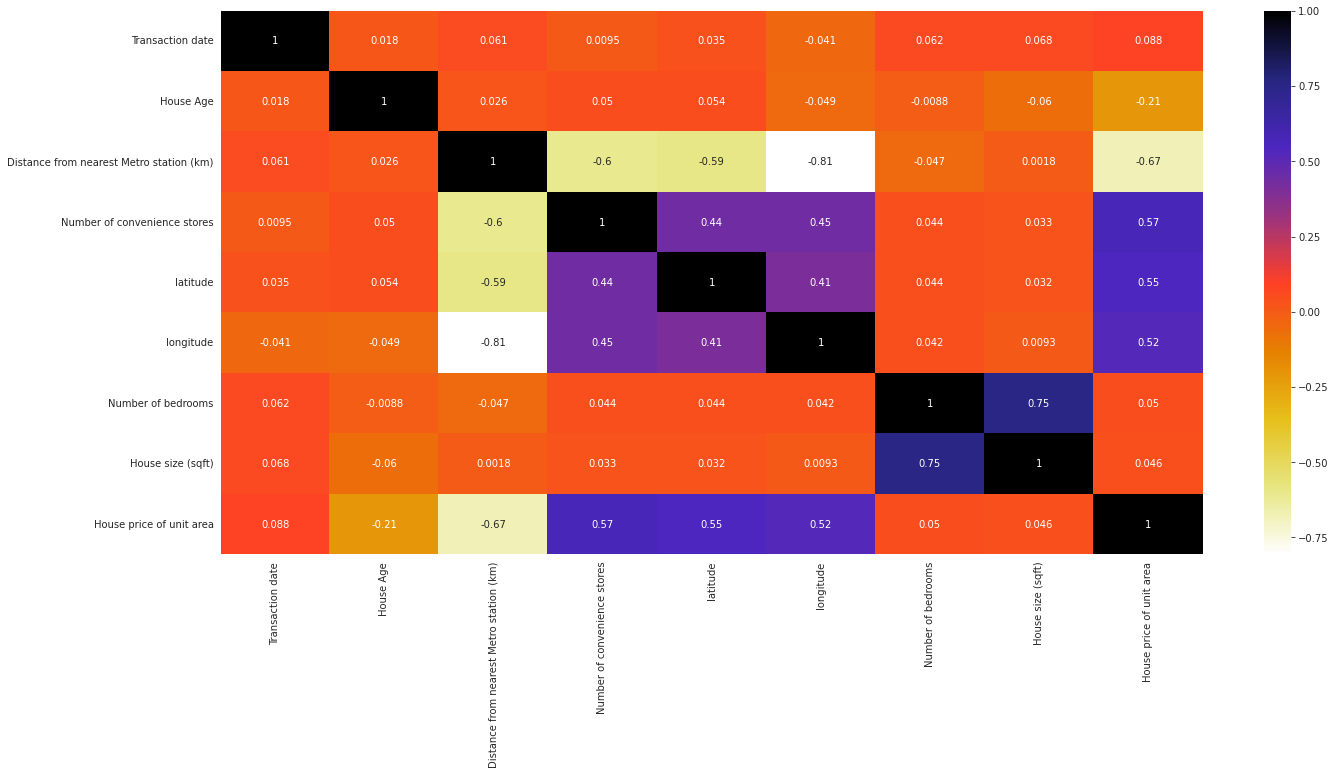

In [22]:
# plot the graph
# Check the correlation using heatmap on data set

#Using Pearson Correlation
plt.figure(figsize=(22,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [23]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [24]:
# Checking highlly correlation on train data
corr_features = correlation(data, 0.9)
len(set(corr_features))

0

* so we understand no feature is highlly correlated

### **Checking for Variacian Inflation(VIF)**

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a function for checking Checking for variacian inflation
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [26]:
# variacian inflation all columns with Rented Bike Count
calc_vif(data[[i for i in data.describe().columns if i not in ['House price of unit area','Transaction date']]])

,variables,VIF
0,House Age,3.499310e+00
1,Distance from nearest Metro station (km),2.993133e+00
2,Number of convenience stores,4.743463e+00
3,latitude,5.922191e+06
4,longitude,5.921506e+06
5,Number of bedrooms,1.606639e+01
6,House size (sqft),1.902487e+01


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


now we can see latitude and longitude are variacian inflation

## **Train test splot**

In [30]:
X = data.drop(columns=['House price of unit area','Transaction date'])
y = np.sqrt(data['House price of unit area'])

In [37]:
# Train test split our data
x_train1,x_test1,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [80]:
from sklearn.preprocessing import PowerTransformer,MinMaxScaler
yeo = MinMaxScaler()
x_train = yeo.fit_transform(x_train1) # fit transform the training set
x_test = yeo.transform(x_test1) #tranform the test set

## **Model Implementation**

**Create a function for scores**

In [81]:
# Appending all models parameters to the corrosponding list
mean_absolut_error = []
mean_sq_error=[]
root_mean_sq_error=[]
training_score =[]
r2_list=[]
adj_r2_list=[]
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model
    
  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  try:
      # finding the best parameters of the model if any 
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
  except:
    pass
    

  #predicting the Test set and evaluting the models 

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    
    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')
  
  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    
    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

    try:
      
      # ploting the graph of feature importance
      
      best = model.best_estimator_
      features = X_train.columns
      importances = best.feature_importances_
      indices = np.argsort(importances)
      plt.figure(figsize=(10,15))
      plt.title('Feature Importance')
      plt.barh(range(len(indices)), importances[indices], color='red', align='center')
      plt.yticks(range(len(indices)), [features[i] for i in indices])
      plt.xlabel('Relative Importance')
      plt.show()
    
    except:
      pass
  
  # Here we appending the parameters for all models 
  mean_absolut_error.append(MAE)
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  training_score.append(training)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  try :
    print("coefficient \n",model.coef_)
    print('\n')
    print("Intercept  = " ,model.intercept_)
  except:
    pass
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values  
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

### Linear Regression

Training score  = 0.6437209412866776
MAE : 0.46763425669267566
MSE : 0.49019411937980656
RMSE : 0.7001386429699524
R2 : 0.5961002209793452
Adjusted R2 :  0.5666491954257558 

********************************************************************************
coefficient 
 [-0.87155144 -2.61107019  0.88179111  1.69805426 -0.15733025 -0.06689316
  0.23556559]


Intercept  =  5.797641203511388


******************** ploting the graph of Actual and predicted only with 80 observation ********************


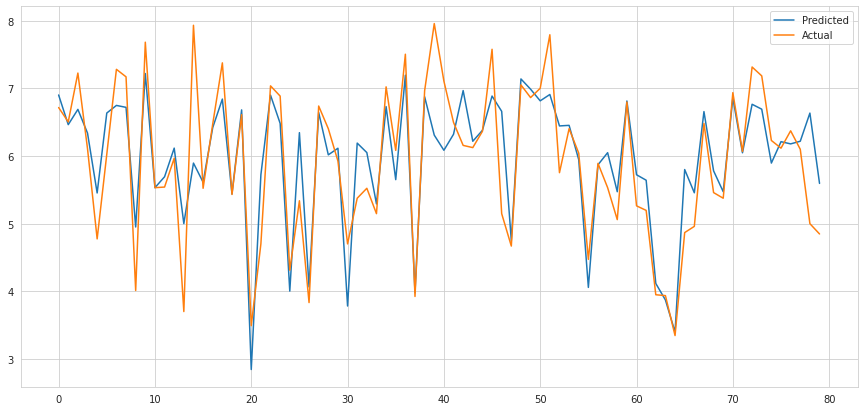

In [82]:
# importing Fitting the linear regression model with our score matrix function 
score_metrix(LinearRegression(),x_train,x_test,y_train,y_test)

### **Lasso with hyperparameter tuning**

In [83]:
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters 
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model

Training score  = 0.6433284534854297
The best parameters found out to be :{'alpha': 0.0014} 
where model best score is:  0.6097970800198442 

MAE : 0.46837348472457846
MSE : 0.48575694651643847
RMSE : 0.6969626579067478
R2 : 0.5997562687941543
Adjusted R2 :  0.5705718300603948 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


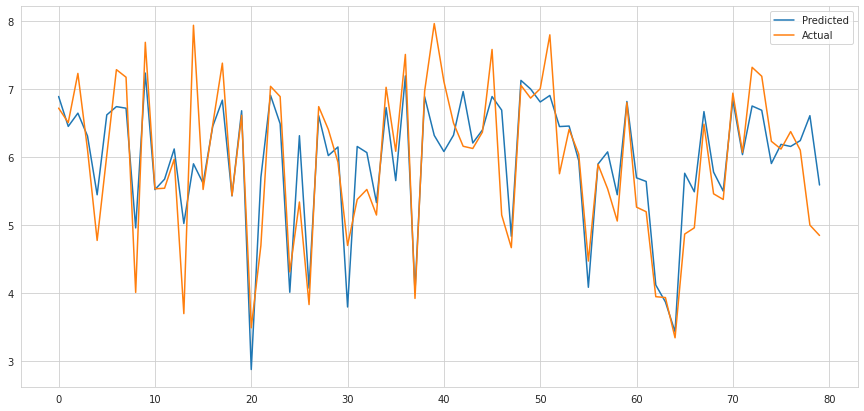

In [84]:
# fit and evaluate model with score_matrix function
score_metrix(lasso_cv,x_train,x_test,y_train,y_test)

In [85]:
# predict data and actual data
train_pred = lasso_cv.predict(x_train)

pd.DataFrame(train_pred,y_train)

,0
House price of unit area,
7.880355,6.722054
7.071068,7.322806
5.594640,5.429216
5.069517,5.207173
6.123724,6.360884
...,...
6.387488,5.890741
6.862944,6.936920
10.839742,6.464979


In [86]:
# predict data and actual data
test_pred = lasso_cv.predict(x_test)

pd.DataFrame(test_pred,y_test)

,0
House price of unit area,
6.715653,6.886238
6.503845,6.447927
7.224957,6.642166
6.107373,6.306444
4.774935,5.444638
...,...
7.416198,6.770924
4.939636,5.271519
5.338539,6.031758


### Decision Tree
**Using Grid Search CV for hyperparameter tuning and try to find best parameters**

In [87]:
# Parameters for Decission Tree model
param_grid = {'criterion' : ["mse"],
              'splitter' : ["best", "random"],
              'max_depth' : [10,15,20,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[2,4,5,9]}

In [88]:
# Using Grid Search 
Dt_grid_search = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid,cv=2,n_jobs=-1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
84 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0,

Training score  = 0.8979174275221213
The best parameters found out to be :{'criterion': 'mse', 'max_depth': 10, 'max_features': 5, 'min_samples_split': 10, 'splitter': 'best'} 
where model best score is:  0.6156274360167049 

MAE : 0.4776860501148944
MSE : 0.4502129054504325
RMSE : 0.6709790648376688
R2 : 0.629043095715343
Adjusted R2 :  0.6019941547779201 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


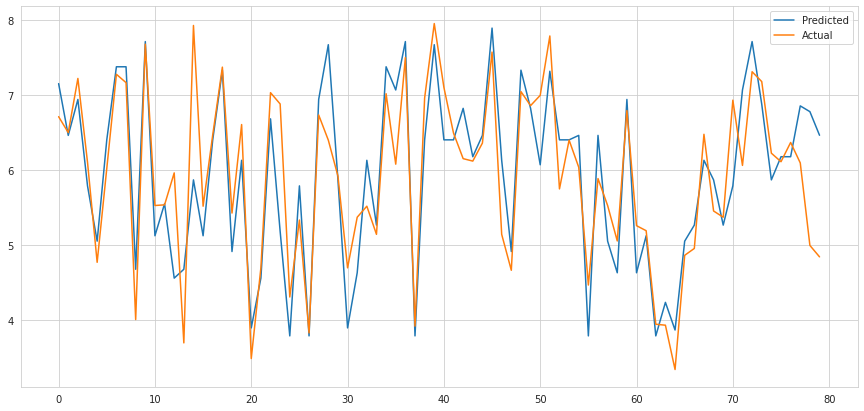

In [89]:
# fit and evaluate model with score_matrix function
score_metrix(Dt_grid_search,x_train,x_test,y_train,y_test)

### **Using Random Forest Regressor**

In [90]:

# parameters for Random forest
param_grid = {"n_estimators":[50,100,150],
              'max_depth' : [10,15,20,25,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[3,6,7,9]}

In [91]:
# Using Grid SearchCV 
Ranom_forest_Grid_search = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,n_jobs=-1,verbose=2)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/p

Training score  = 0.8930026319803634
The best parameters found out to be :{'max_depth': 10, 'max_features': 3, 'min_samples_split': 10, 'n_estimators': 50} 
where model best score is:  0.7264274768690104 

MAE : 0.3736508519024358
MSE : 0.320990080708552
RMSE : 0.5665598650703666
R2 : 0.7355173847657808
Adjusted R2 :  0.716232194071619 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


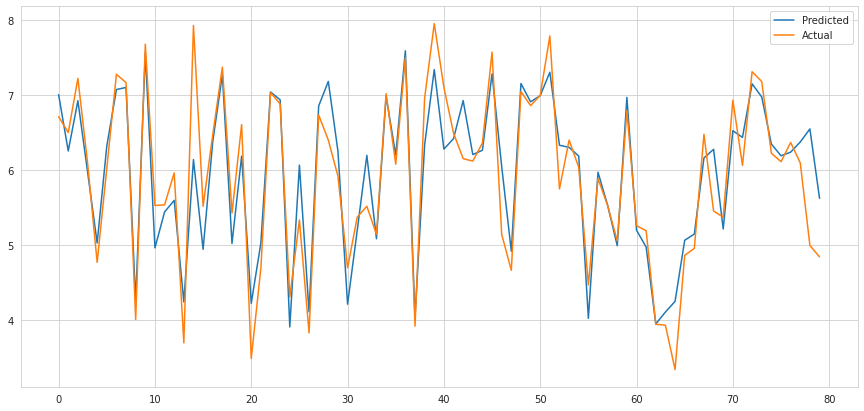

In [92]:
# fit and evaluate model with score_matrix function
score_metrix(Ranom_forest_Grid_search,x_train,x_test,y_train,y_test)

### **XGBoost Regression**

In [93]:
#importing XGBoost Regressor
params = {'learning_rate':[0.5,1,1.5,2],'n_estimators':[80,100,150],'max_depth':[15,20,30]}

In [94]:
#creating xgb grid model
xgb_grid_search= GridSearchCV(XGBRegressor(),param_grid=params,)

[07:58:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

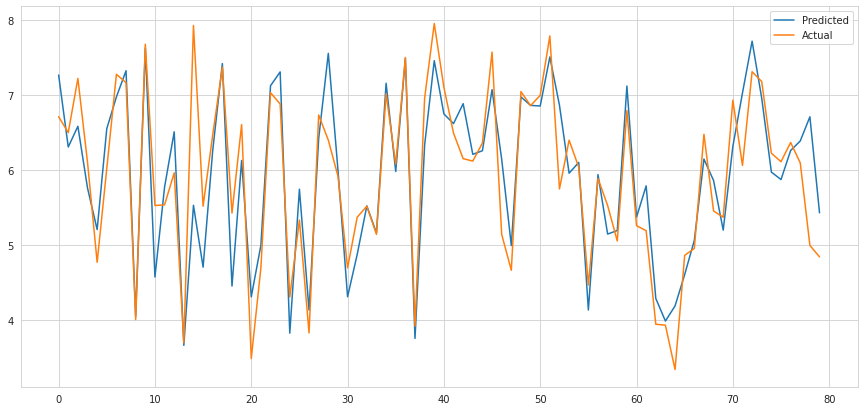

In [95]:
score_metrix(xgb_grid_search,x_train,x_test,y_train,y_test)

## **Creating Data Frame of all Evaluation Matrix with respect of models**

In [96]:
#creating dictionary to store all the metrices 
all_matrices={'Mean_Absolute_error':mean_absolut_error,'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'Training_score':training_score,'R2':r2_list,'Adjusted_R2':adj_r2_list}
#list of all model name 
model_name=['Linear','Lasso','Decision Tree','Random Forest Regressor','XGBoost Regression']
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_matrices,orient='index',columns=model_name)
matrices_df

,Linear,Lasso,Decision Tree,Random Forest Regressor,XGBoost Regression
Mean_Absolute_error,0.467634,0.468373,0.477686,0.373651,0.436433
Mean_square_error,0.490194,0.485757,0.450213,0.320990,0.381530
Root_Mean_square_error,0.700139,0.696963,0.670979,0.566560,0.617681
Training_score,0.643721,0.643328,0.897917,0.893003,1.000000
R2,0.596100,0.599756,0.629043,0.735517,0.685635
Adjusted_R2,0.566649,0.570572,0.601994,0.716232,0.662713
